# Experiments

In [1]:
#!pip install matplotlib
#!pip install pandas
#!pip install tqdm

# code for importing from src
import os
os.chdir('../') # change working directory to the root of the project
# install package in editable mode
!pip install -e . 
os.chdir('src') # change working directory back to src

Obtaining file:///C:/Users/choho/Desktop/Master%20DS/Deep%20learning%20II/github/DeepLearning2-Project-M2DS
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Checking if build backend supports build_editable: started
  Checking if build backend supports build_editable: finished with status 'done'
  Getting requirements to build editable: started
  Getting requirements to build editable: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
  Preparing editable metadata (pyproject.toml): started
  Preparing editable metadata (pyproject.toml): finished with status 'done'
  Building editable for generative_model (pyproject.toml): started
  Building editable for generative_model (pyproject.toml): finished with status 'done'
  Created wheel for generative_model: filename=generative_model-0.1-0.editable-py3-none-any.whl size=13944 sha256=0d02cc1c902960f514c0b0

In [2]:
# Import.
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from models.rbm import RBM
from models.dbn import DBN
from models.dnn import DNN
from utils import (
    load_mnist,
    load_alphadigit,
    read_alpha_digit,
    plot_characters_alphadigit,
    plot_generated_images
)

In [3]:
DATA_FOLDER = "../data/"
ALPHA_DIGIT_PATH = os.path.join(DATA_FOLDER, "binaryalphadigs.mat")
MNIST_PATH = os.path.join(DATA_FOLDER, "mnist_all.mat")

for path in [ALPHA_DIGIT_PATH, MNIST_PATH]:
    if not os.path.exists(path):
        raise FileNotFoundError(f"The file {path} does not exist.")

SEED = 42

## 1. Study on BinaryAlphaDigit

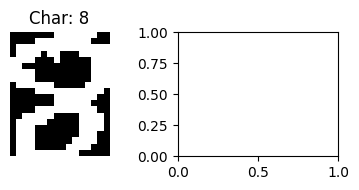

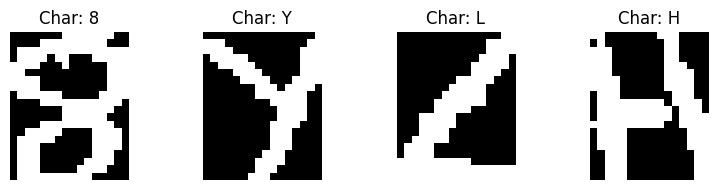

Original data: (36, 39)
Original data (unstack samples -> flatten images): (1365, 320)
Subset (1 character) data  (39, 320)
Subset (4 characters) data  (156, 320)


In [4]:
alphadigit = load_alphadigit(ALPHA_DIGIT_PATH)

chars_1 = [8]
chars_2 = chars_1 + ["Y"]
chars_3 = chars_2 + ["L"]
chars_4 = chars_3 + ["H"]
data_alpha_1 = read_alpha_digit(chars_1, data=alphadigit, use_data=True)
data_alpha_2 = read_alpha_digit(chars_2, data=alphadigit, use_data=True)
data_alpha_3 = read_alpha_digit(chars_3, data=alphadigit, use_data=True)
data_alpha_4 = read_alpha_digit(chars_4, data=alphadigit, use_data=True)

all_chars = np.arange(0, 35).tolist()
alphadigit_data = read_alpha_digit(all_chars, data=alphadigit, use_data=True) # read all characters

plot_characters_alphadigit(chars_1, data_alpha_1)
plot_characters_alphadigit(chars_4, data_alpha_4)

print("Original data:", alphadigit.shape)
print("Original data (unstack samples -> flatten images):", alphadigit_data.shape)
print(f"Subset ({len(chars_1)} character) data ", data_alpha_1.shape)
print(f"Subset ({len(chars_4)} characters) data ", data_alpha_4.shape)

### RBM

In [5]:
data_alpha = data_alpha_1
n_chars = data_alpha.shape[0] / 39

# Parameters
n_visible = data_alpha.shape[1]  # Number of visible units (size of each image)
n_hidden = 200  # Number of hidden units (hyperparameter)
learning_rate = 0.1
n_epochs = 100
batch_size = int(8 * n_chars)

# Initialize RBM
rbm = RBM(n_visible=n_visible, n_hidden=n_hidden, random_state=SEED)
print(rbm)

# Train RBM
rbm.train(data_alpha, learning_rate=learning_rate, n_epochs=n_epochs, batch_size=batch_size)

RBM(n_visible=320, n_hidden=200)


[0.2288,
 0.2056,
 0.2133,
 0.1863,
 0.184,
 0.1968,
 0.1862,
 0.1958,
 0.1735,
 0.1743,
 0.1879,
 0.1706,
 0.1564,
 0.1766,
 0.2011,
 0.158,
 0.199,
 0.1701,
 0.1641,
 0.2054,
 0.1746,
 0.1632,
 0.1348,
 0.1765,
 0.1417,
 0.1458,
 0.1404,
 0.1551,
 0.1345,
 0.1524,
 0.1437,
 0.1504,
 0.1596,
 0.1386,
 0.1311,
 0.1637,
 0.1363,
 0.1458,
 0.1603,
 0.1189,
 0.1173,
 0.1593,
 0.139,
 0.1317,
 0.1056,
 0.1481,
 0.1592,
 0.1063,
 0.1248,
 0.1268,
 0.1116,
 0.1078,
 0.1205,
 0.1015,
 0.1327,
 0.1222,
 0.1075,
 0.1284,
 0.1265,
 0.1534,
 0.0935,
 0.1138,
 0.1276,
 0.1299,
 0.1148,
 0.1249,
 0.1166,
 0.1173,
 0.1166,
 0.0965,
 0.1311,
 0.0987,
 0.109,
 0.1126,
 0.0896,
 0.1041,
 0.1231,
 0.1066,
 0.1022,
 0.1061,
 0.1104,
 0.1105,
 0.1055,
 0.1173,
 0.1136,
 0.1335,
 0.1006,
 0.1049,
 0.1133,
 0.1184,
 0.1014,
 0.1317,
 0.1081,
 0.0904,
 0.1172,
 0.085,
 0.1171,
 0.1191,
 0.1051,
 0.1293]

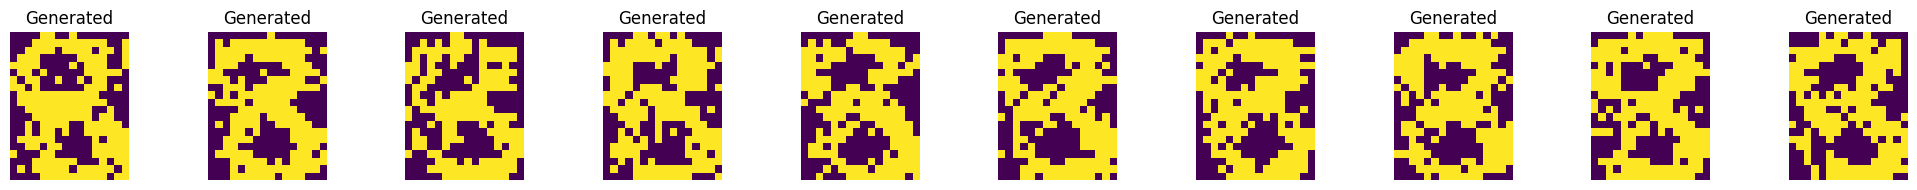

In [6]:
# Generate samples
generated_samples = rbm.generate_image(n_samples=10, n_gibbs_steps=1)

plot_generated_images(generated_samples, **{"cmap":None})

### DBN

In [7]:
data_alpha = data_alpha_1
n_chars = data_alpha.shape[0] / 39

# Parameters
n_visible = data_alpha.shape[1]  # Number of visible units (size of each image)
n_hidden = 200  # Number of hidden units (hyperparameter)
hidden_layer_sizes = [200, 200, 200]

learning_rate = 0.1
n_epochs = 100
batch_size = int(8 * n_chars)

dbn = DBN(n_visible=n_visible, hidden_layer_sizes=hidden_layer_sizes, random_state=SEED)
dbn.train(data_alpha, learning_rate=learning_rate, n_epochs=n_epochs, batch_size=batch_size)

Training RBM layers: 100%|██████████| 3/3 [00:01<00:00,  2.17layer/s]


([0.2288,
  0.2056,
  0.2133,
  0.1863,
  0.184,
  0.1968,
  0.1862,
  0.1958,
  0.1735,
  0.1743,
  0.1879,
  0.1706,
  0.1564,
  0.1766,
  0.2011,
  0.158,
  0.199,
  0.1701,
  0.1641,
  0.2054,
  0.1746,
  0.1632,
  0.1348,
  0.1765,
  0.1417,
  0.1458,
  0.1404,
  0.1551,
  0.1345,
  0.1524,
  0.1437,
  0.1504,
  0.1596,
  0.1386,
  0.1311,
  0.1637,
  0.1363,
  0.1458,
  0.1603,
  0.1189,
  0.1173,
  0.1593,
  0.139,
  0.1317,
  0.1056,
  0.1481,
  0.1592,
  0.1063,
  0.1248,
  0.1268,
  0.1116,
  0.1078,
  0.1205,
  0.1015,
  0.1327,
  0.1222,
  0.1075,
  0.1284,
  0.1265,
  0.1534,
  0.0935,
  0.1138,
  0.1276,
  0.1299,
  0.1148,
  0.1249,
  0.1166,
  0.1173,
  0.1166,
  0.0965,
  0.1311,
  0.0987,
  0.109,
  0.1126,
  0.0896,
  0.1041,
  0.1231,
  0.1066,
  0.1022,
  0.1061,
  0.1104,
  0.1105,
  0.1055,
  0.1173,
  0.1136,
  0.1335,
  0.1006,
  0.1049,
  0.1133,
  0.1184,
  0.1014,
  0.1317,
  0.1081,
  0.0904,
  0.1172,
  0.085,
  0.1171,
  0.1191,
  0.1051,
  0.1293,
  0.00

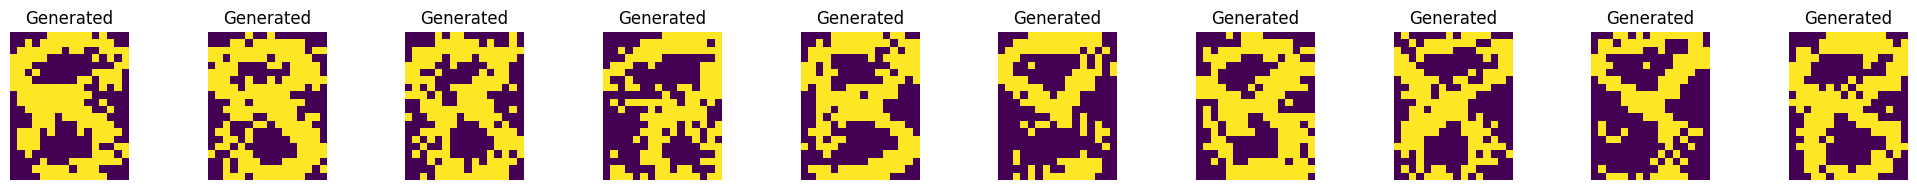

In [8]:
# # Generate images
generated_images = dbn.generate_image(n_samples=10, n_gibbs_steps=1)

# Display generated images
plot_generated_images(generated_images, **{"cmap":None})

### MNIST

In [9]:
import scipy.io

In [10]:
def load_mnist(mnist_path, mnist_dict=None, use_dict=False):
    if not use_dict:
        mnist_dict = scipy.io.loadmat(mnist_path)
    
    X_train = np.concatenate([mnist_dict[f"train{i}"] for i in range(10)], axis=0)
    X_test = np.concatenate([mnist_dict[f"test{i}"] for i in range(10)], axis=0)
    
    y_train = np.concatenate([np.eye(10)[[i]*mnist_dict[f"train{i}"].shape[0]] for i in range(10)], axis=0)
    y_test = np.concatenate([np.eye(10)[[i]*mnist_dict[f"test{i}"].shape[0]] for i in range(10)], axis=0)

    return X_train, y_train, X_test, y_test


def sample_indices(data_size: int, sample_size: int, random_state=None) -> np.ndarray:
    """
    Randomly sample indices from the range [0, data_size) without replacement.

    Parameters:
        data_size (int): Total number of indices available.
        sample_size (int): Number of indices to sample.
        random_state: Random seed for reproducibility.

    Returns:
        numpy.ndarray: Array of sampled indices.
    """
    rng = np.random.default_rng(random_state)
    if sample_size >= data_size:
        return np.arange(data_size)

    sampled_indices = rng.choice(data_size, size=sample_size, replace=False)
    return sampled_indices

def sample_mnist(X_train: np.ndarray, y_train: np.ndarray, sample_size: int, random_state=None) -> tuple:
    """
    Randomly sample a subset of samples from the MNIST dataset.

    Parameters:
        X_train (numpy.ndarray): Training data.
        y_train (numpy.ndarray): Training labels.
        sample_size (int): Number of samples to sample.
        random_state: Random seed for reproducibility.

    Returns:
        tuple: Sampled subset of training data and labels.
    """
    # Sample indices
    indices = sample_indices(len(X_train), sample_size, random_state=random_state)
    
    # Sample data and labels
    sampled_X_train = X_train[indices]
    sampled_y_train = y_train[indices]
    
    return sampled_X_train, sampled_y_train


def binarize_images(images):
    threshold = 127
    binary_images = np.where(images > threshold, 1, 0)
    return binary_images

mnist_train, mnist_train_labels, mnist_test, mnist_test_labels = (
    load_mnist(MNIST_PATH)
)


# Binarize the images
binary_mnist_train = binarize_images(mnist_train)
binary_mnist_test = binarize_images(mnist_test)


[mnist.shape for mnist in (mnist_train, mnist_train_labels, mnist_test, mnist_test_labels)]

[(60000, 784), (60000, 10), (10000, 784), (10000, 10)]

In [11]:
mnist_train_30000, mnist_train_labels_30000 = sample_mnist(mnist_train, mnist_train_labels, 30_000, 42)
mnist_train_30000.shape, mnist_train_labels_30000.shape

((30000, 784), (30000, 10))

In [12]:
print(mnist_train.max(), binary_mnist_train.max())

255 1


MNIST (60000, 28, 28)


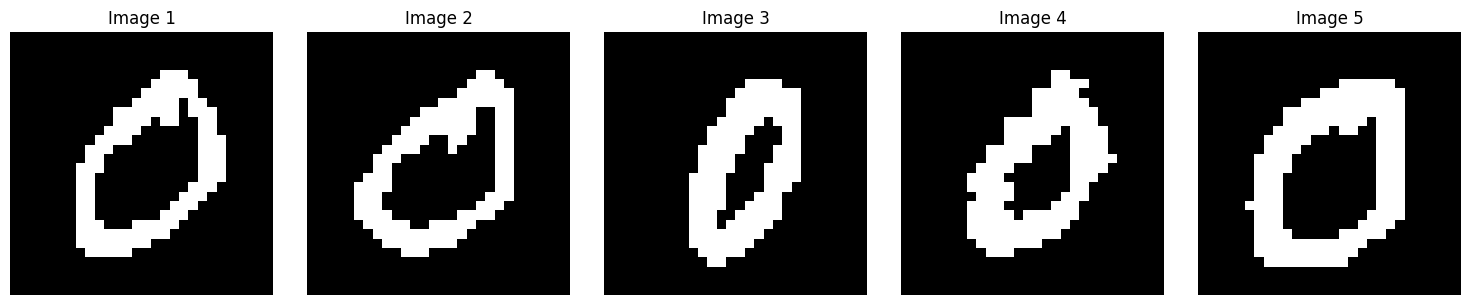

In [13]:
# Reshape mnist_train to its original shape
image_height = 28
image_width = 28
num_samples = binary_mnist_train.shape[0]
binary_mnist_train_images = binary_mnist_train.reshape(num_samples, image_height, image_width)
print("MNIST", binary_mnist_train_images.shape)

# Plot some images from mnist_train
num_images_to_plot = 5
fig, axes = plt.subplots(1, num_images_to_plot, figsize=(15, 3))
for i in range(num_images_to_plot):
    axes[i].imshow(binary_mnist_train_images[i], cmap='gray')
    axes[i].set_title(f"Image {i+1}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

In [14]:
help(DNN)

Help on class DNN in module models.dnn:

class DNN(models.dbn.DBN)
 |  DNN(input_dim: int, output_dim: int, hidden_layer_sizes: List[int], random_state=None)
 |  
 |  Method resolution order:
 |      DNN
 |      models.dbn.DBN
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, key)
 |  
 |  __init__(self, input_dim: int, output_dim: int, hidden_layer_sizes: List[int], random_state=None)
 |      Initialize the Deep Neural Network (DNN).
 |      
 |      Parameters:
 |      - input_dim (int): Dimension of the input.
 |      - output_dim (int): Dimension of the output.
 |      - hidden_layer_sizes (List[int]): List of sizes for each hidden layer.
 |      - random_state: Random seed for reproducibility.
 |  
 |  __len__(self)
 |  
 |  __repr__(self)
 |      Return a string representation of the DBN object.
 |  
 |  backpropagation(self, input_data: numpy.ndarray, labels: numpy.ndarray, n_epochs: int = 100, learning_rate: float = 0.1, batch_size: int = 10, eps

# 0.Verify that DNN work well

Training:  10%|█         | 1/10 [00:01<00:15,  1.76s/epoch]

Epoch 1/10, Cross Entropy: 1.05767168050581


Training:  20%|██        | 2/10 [00:03<00:15,  1.93s/epoch]

Epoch 2/10, Cross Entropy: 0.6136521446180725


Training:  30%|███       | 3/10 [00:05<00:13,  1.88s/epoch]

Epoch 3/10, Cross Entropy: 0.5316356260213012


Training:  40%|████      | 4/10 [00:07<00:11,  1.93s/epoch]

Epoch 4/10, Cross Entropy: 0.49160113299211866


Training:  50%|█████     | 5/10 [00:09<00:09,  1.91s/epoch]

Epoch 5/10, Cross Entropy: 0.4660903166129116


Training:  60%|██████    | 6/10 [00:11<00:07,  1.85s/epoch]

Epoch 6/10, Cross Entropy: 0.44947660317756166


Training:  70%|███████   | 7/10 [00:12<00:05,  1.82s/epoch]

Epoch 7/10, Cross Entropy: 0.43602165012878247


Training:  80%|████████  | 8/10 [00:14<00:03,  1.81s/epoch]

Epoch 8/10, Cross Entropy: 0.4260887410464448


Training:  90%|█████████ | 9/10 [00:16<00:01,  1.78s/epoch]

Epoch 9/10, Cross Entropy: 0.41775720832888896


Training: 100%|██████████| 10/10 [00:18<00:00,  1.83s/epoch]


Epoch 10/10, Cross Entropy: 0.41076202484114005
(0.11339999999999995, array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]]))


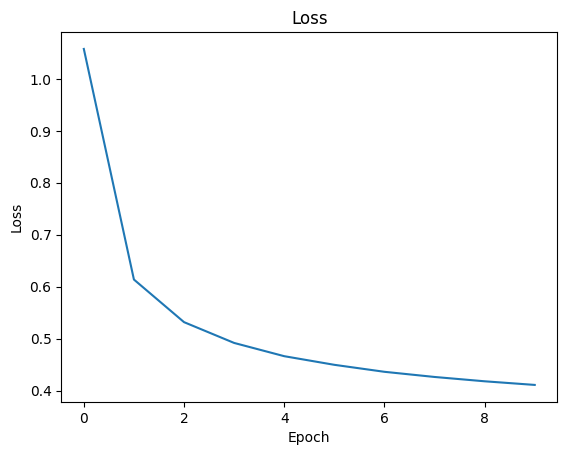

In [17]:
from copy import copy, deepcopy

data = mnist_train.copy()
n_samples, n_visible = data.shape # n_samples, n_features
n_visible = data.shape[1]
hidden_layer_sizes = [250]
n_classes = mnist_test_labels.shape[1]

dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)

losses_100 = dnn.backpropagation(mnist_train, labels=mnist_train_labels, n_epochs=10, learning_rate=3e-4, batch_size=512)


print(dnn.test(mnist_test, mnist_test_labels))

#plotter la loss à partir d'une liste de loss
plt.plot(losses_100)
plt.title("Loss")   
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 1. Error rate according to varying layers numbers

In [18]:
import matplotlib.pyplot as plt
import pickle
import numpy as np


def save_object(obj, filename, output_dir):
    """
    Save a Python object to a file using pickle.

    Parameters:
    - obj: The Python object to save.
    - filename (str): The name of the file to save the object to.
    - output_dir (str): The directory where to save the file.
    """
    os.makedirs(output_dir, exist_ok=True)
    filepath = os.path.join(output_dir, filename)
    with open(filepath, 'wb') as f:
        pickle.dump(obj, f)

def load_object(filename, output_dir):
    """
    Load a Python object from a file using pickle.

    Parameters:
    - filename (str): The name of the file to load the object from.
    - output_dir (str): The directory where the file is located.

    Returns:
    - The Python object loaded from the file.
    """
    filepath = os.path.join(output_dir, filename)
    with open(filepath, 'rb') as f:
        return pickle.load(f)

## 1.1. Without pretraining

In [19]:
n_samples, n_visible = mnist_train.shape # n_samples, n_features
n_classes = mnist_test_labels.shape[1]

layer_loss = []
layer_error_rate_train = []
layer_error_rate_test = []
for n_layers in [1, 2, 3, 4, 5]:
    hidden_layer_sizes = [200] * n_layers
    dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    loss = dnn.backpropagation(mnist_train, labels=mnist_train_labels, n_epochs=2, learning_rate=3e-4, batch_size=512)
    layer_loss.append(loss)
    
    error_rate_train, _ = dnn.test(test_data=mnist_train, true_labels=mnist_train_labels)
    layer_error_rate_train.append(error_rate_train)  # Assurez-vous que error_rate_train est un scalaire

    error_rate_test, _ = dnn.test(test_data=mnist_test, true_labels=mnist_test_labels)
    layer_error_rate_test.append(error_rate_test)  # Assurez-vous que error_rate_test est un scalaire

    # Save the lists with losses and error rates
    save_object(layer_loss, "layer_loss_" + str(n_layers) + ".pkl", output_dir="../results/experiments_mnist")
    save_object(layer_error_rate_train, "layer_error_rate_train_" + str(n_layers) + ".pkl",output_dir="../results/experiments_mnist")
    save_object(layer_error_rate_test, "layer_error_rate_test_" + str(n_layers) + ".pkl",output_dir="../results/experiments_mnist")


Training:  50%|█████     | 1/2 [00:01<00:01,  1.59s/epoch]

Epoch 1/2, Cross Entropy: 1.1417295276372392


Training: 100%|██████████| 2/2 [00:03<00:00,  1.54s/epoch]


Epoch 2/2, Cross Entropy: 0.6643635153036658


Training:  50%|█████     | 1/2 [00:02<00:02,  2.64s/epoch]

Epoch 1/2, Cross Entropy: 2.1913343668611893


Training: 100%|██████████| 2/2 [00:05<00:00,  2.57s/epoch]


Epoch 2/2, Cross Entropy: 1.8369298115604806


Training:  50%|█████     | 1/2 [00:03<00:03,  3.28s/epoch]

Epoch 1/2, Cross Entropy: 2.4244450546357657


Training: 100%|██████████| 2/2 [00:06<00:00,  3.31s/epoch]


Epoch 2/2, Cross Entropy: 2.310296981733941


Training:  50%|█████     | 1/2 [00:04<00:04,  4.18s/epoch]

Epoch 1/2, Cross Entropy: 2.4457540677150162


Training: 100%|██████████| 2/2 [00:08<00:00,  4.21s/epoch]


Epoch 2/2, Cross Entropy: 2.3642437821107336


Training:  50%|█████     | 1/2 [00:04<00:04,  4.95s/epoch]

Epoch 1/2, Cross Entropy: 2.4500441599314318


Training: 100%|██████████| 2/2 [00:09<00:00,  4.99s/epoch]


Epoch 2/2, Cross Entropy: 2.3711599254251188


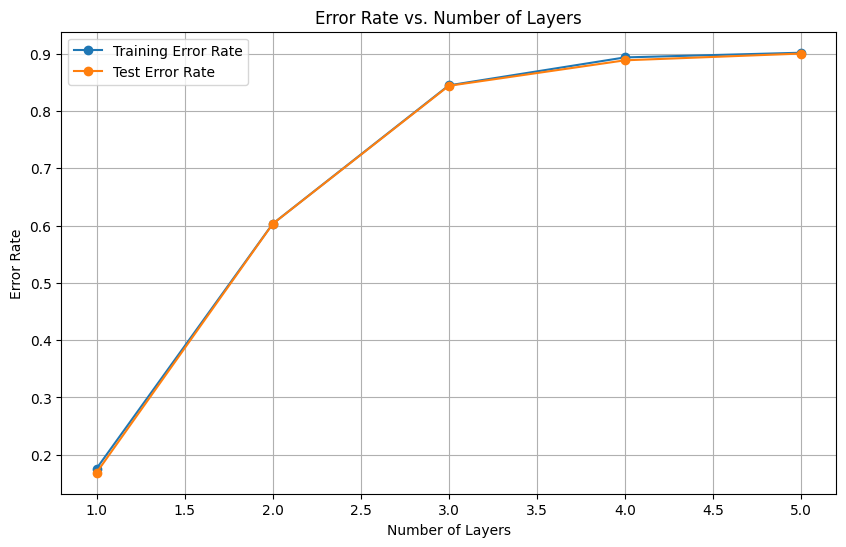

In [22]:
import matplotlib.pyplot as plt

# Load the error rates for each number of layers
num_layers = [1, 2, 3, 4, 5]
train_error_rates = []
test_error_rates = []

for n_layers in num_layers:
    train_error_rate_layer = load_object("layer_error_rate_train_" + str(n_layers) + ".pkl","../results/experiments_mnist")
    test_error_rate_layer = load_object("layer_error_rate_test_" + str(n_layers) + ".pkl","../results/experiments_mnist")
    
# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(num_layers, train_error_rate_layer, label='Training Error Rate', marker='o')
plt.plot(num_layers, test_error_rate_layer, label='Test Error Rate', marker='o')

plt.xlabel('Number of Layers')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Layers')
plt.legend()
plt.grid(True)
plt.show()


## 1.2. With pretraining

In [21]:
n_samples, n_visible = mnist_train.shape # n_samples, n_features
n_classes = mnist_test_labels.shape[1]

layer_loss = []
layer_error_rate_train = []
layer_error_rate_test = []
for n_layers in [1, 2, 3, 4, 5]:
    hidden_layer_sizes = [200] * n_layers
    dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    # pretrain
    dnn.train(mnist_train, n_epochs=2, learning_rate=3e-4, batch_size=512)

    loss = dnn.backpropagation(mnist_train, labels=mnist_train_labels, n_epochs=2, learning_rate=3e-4, batch_size=512)
    layer_loss.append(loss)
    
    error_rate_train, _ = dnn.test(test_data=mnist_train, true_labels=mnist_train_labels)
    layer_error_rate_train.append(error_rate_train)  # Assurez-vous que error_rate_train est un scalaire

    error_rate_test, _ = dnn.test(test_data=mnist_test, true_labels=mnist_test_labels)
    layer_error_rate_test.append(error_rate_test)  # Assurez-vous que error_rate_test est un scalaire

    # Save the lists with losses and error rates
    save_object(layer_loss, "pretrain_layer_loss_" + str(n_layers) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_train, "pretrain_layer_error_rate_train_" + str(n_layers) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_test, "pretrain_layer_error_rate_test_" + str(n_layers) + ".pkl","../results/experiments_mnist")


Training:  50%|█████     | 1/2 [00:01<00:01,  1.79s/epoch]

Epoch 1/2, Cross Entropy: 3.659219698383856


Training: 100%|██████████| 2/2 [00:03<00:00,  1.76s/epoch]


Epoch 2/2, Cross Entropy: 3.5610295883870795


Training:  50%|█████     | 1/2 [00:02<00:02,  2.75s/epoch]

Epoch 1/2, Cross Entropy: 2.6183370929094973


Training: 100%|██████████| 2/2 [00:05<00:00,  2.63s/epoch]


Epoch 2/2, Cross Entropy: 2.610274121639611


Training:  50%|█████     | 1/2 [00:03<00:03,  3.16s/epoch]

Epoch 1/2, Cross Entropy: 2.359382566416578


Training: 100%|██████████| 2/2 [00:06<00:00,  3.18s/epoch]


Epoch 2/2, Cross Entropy: 2.351668621995758


Training:  50%|█████     | 1/2 [00:03<00:03,  3.90s/epoch]

Epoch 1/2, Cross Entropy: 2.43395918391572


Training: 100%|██████████| 2/2 [00:07<00:00,  3.94s/epoch]


Epoch 2/2, Cross Entropy: 2.410884558084077


Training:  50%|█████     | 1/2 [00:04<00:04,  4.71s/epoch]

Epoch 1/2, Cross Entropy: 2.3356858028080603


Training: 100%|██████████| 2/2 [00:09<00:00,  4.65s/epoch]


Epoch 2/2, Cross Entropy: 2.3284755584717294


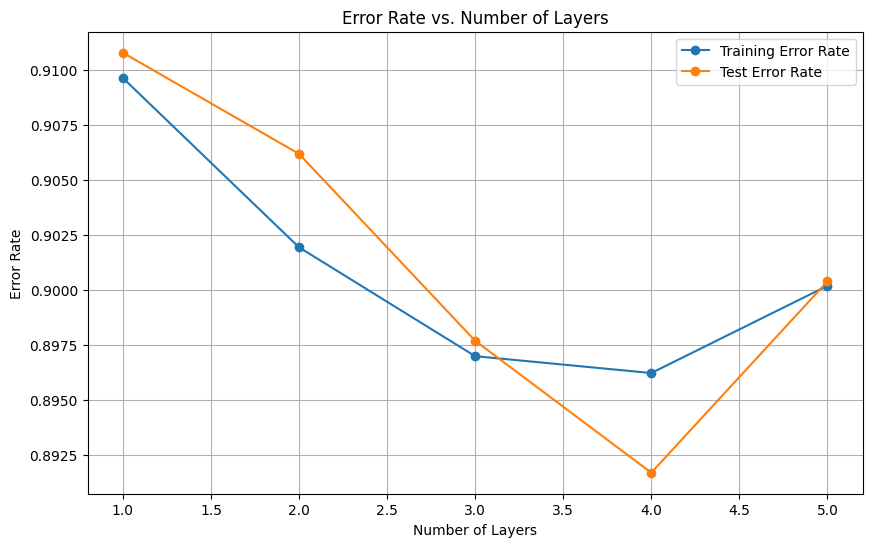

In [23]:
import matplotlib.pyplot as plt

# Load the error rates for each number of layers
num_layers = [1, 2, 3, 4, 5]
train_error_rates = []
test_error_rates = []

for n_layers in num_layers:
    train_error_rate_layer = load_object("pretrain_layer_error_rate_train_" + str(n_layers) + ".pkl","../results/experiments_mnist")
    test_error_rate_layer = load_object("pretrain_layer_error_rate_test_" + str(n_layers) + ".pkl","../results/experiments_mnist")
    
# Plotting the error rates
plt.figure(figsize=(10, 6))
plt.plot(num_layers, train_error_rate_layer, label='Training Error Rate', marker='o')
plt.plot(num_layers, test_error_rate_layer, label='Test Error Rate', marker='o')

plt.xlabel('Number of Layers')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Layers')
plt.legend()
plt.grid(True)
plt.show()


# 2.  number of neurons per layers

## 2.1. Without pretraining

In [54]:
n_samples, n_visible = mnist_train.shape # n_samples, n_features
n_classes = mnist_test_labels.shape[1]

neurons_per_layer = [100, 300, 500, 700]
layer_loss_neurons = []
layer_error_rate_train_neurons = []
layer_error_rate_test_neurons = []

for n_neurons in neurons_per_layer:
    hidden_layer_sizes = [n_neurons] * 2  # Fixer le nombre de couches à 2
    dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    loss = dnn.backpropagation(mnist_train, labels=mnist_train_labels, n_epochs=2, learning_rate=3e-4, batch_size=512)
    layer_loss_neurons.append(loss)
    
    error_rate_train, _ = dnn.test(test_data=mnist_train, true_labels=mnist_train_labels)
    layer_error_rate_train_neurons.append(error_rate_train)  # Assurez-vous que error_rate_train est un scalaire

    error_rate_test, _ = dnn.test(test_data=mnist_test, true_labels=mnist_test_labels)
    layer_error_rate_test_neurons.append(error_rate_test)  # Assurez-vous que error_rate_test est un scalaire

    # Save the lists with losses and error rates
    save_object(layer_loss_neurons, "layer_loss_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_train_neurons, "layer_error_rate_train_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_test_neurons, "layer_error_rate_test_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")


Training:   0%|          | 0/2 [00:00<?, ?epoch/s]c:\Users\choho\Desktop\Master DS\Deep learning II\github\DeepLearning2-Project-M2DS\src\functionals.py:17: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))
Training:  50%|█████     | 1/2 [00:01<00:01,  1.58s/epoch]

Epoch 1/2, Cross Entropy: 2.303557957061037


Training: 100%|██████████| 2/2 [00:03<00:00,  1.71s/epoch]


Epoch 2/2, Cross Entropy: 2.1685645264598374


Training:  50%|█████     | 1/2 [00:03<00:03,  3.21s/epoch]

Epoch 1/2, Cross Entropy: 2.0662249553704988


Training: 100%|██████████| 2/2 [00:06<00:00,  3.19s/epoch]


Epoch 2/2, Cross Entropy: 1.5924815650843203


Training:  50%|█████     | 1/2 [00:04<00:04,  4.65s/epoch]

Epoch 1/2, Cross Entropy: 1.908004847152414


Training: 100%|██████████| 2/2 [00:09<00:00,  4.80s/epoch]


Epoch 2/2, Cross Entropy: 1.2396291301228255


Training:  50%|█████     | 1/2 [00:06<00:06,  6.22s/epoch]

Epoch 1/2, Cross Entropy: 1.9931057655999065


Training: 100%|██████████| 2/2 [00:12<00:00,  6.37s/epoch]


Epoch 2/2, Cross Entropy: 1.1231430432138803


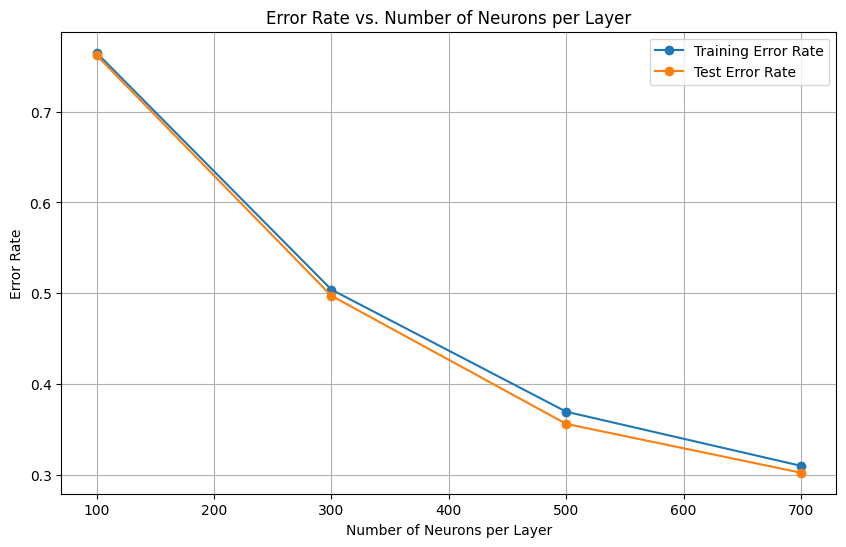

In [55]:
import matplotlib.pyplot as plt

# Load the error rates for each number of neurons per layer
neurons_per_layer = [100, 300, 500, 700]
train_error_rates_neurons = []
test_error_rates_neurons = []

for n_neurons in neurons_per_layer:
    train_error_rates_neurons = load_object("layer_error_rate_train_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    test_error_rates_neurons = load_object("layer_error_rate_test_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    

# Plotting the error rates for different numbers of neurons per layer
plt.figure(figsize=(10, 6))
plt.plot(neurons_per_layer, train_error_rates_neurons, label='Training Error Rate', marker='o')
plt.plot(neurons_per_layer, test_error_rates_neurons, label='Test Error Rate', marker='o')

plt.xlabel('Number of Neurons per Layer')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Neurons per Layer')
plt.legend()
plt.grid(True)
plt.show()


## 2.2. With pretraining

In [26]:
n_samples, n_visible = mnist_train.shape # n_samples, n_features
n_classes = mnist_test_labels.shape[1]

neurons_per_layer = [100, 300, 500, 700]
layer_loss_neurons = []
layer_error_rate_train_neurons = []
layer_error_rate_test_neurons = []

for n_neurons in neurons_per_layer:
    hidden_layer_sizes = [n_neurons] * 2  # Fixer le nombre de couches à 2
    dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    
    # pretrain
    dnn.train(mnist_train, n_epochs=2, learning_rate=3e-4, batch_size=512)
    
    loss = dnn.backpropagation(mnist_train, labels=mnist_train_labels, n_epochs=2, learning_rate=3e-4, batch_size=512)
    layer_loss_neurons.append(loss)
    
    error_rate_train, _ = dnn.test(test_data=mnist_train, true_labels=mnist_train_labels)
    layer_error_rate_train_neurons.append(error_rate_train)  # Assurez-vous que error_rate_train est un scalaire

    error_rate_test, _ = dnn.test(test_data=mnist_test, true_labels=mnist_test_labels)
    layer_error_rate_test_neurons.append(error_rate_test)  # Assurez-vous que error_rate_test est un scalaire

    # Save the lists with losses and error rates
    save_object(layer_loss_neurons, "pretrain_layer_loss_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_train_neurons, "pretrain_layer_error_rate_train_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_test_neurons, "pretrain_layer_error_rate_test_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")


Training:   0%|          | 0/2 [00:00<?, ?epoch/s]

Training:  50%|█████     | 1/2 [00:01<00:01,  1.74s/epoch]

Epoch 1/2, Cross Entropy: 2.287356159996537


Training: 100%|██████████| 2/2 [00:03<00:00,  1.74s/epoch]


Epoch 2/2, Cross Entropy: 2.1625316078674395


Training:  50%|█████     | 1/2 [00:03<00:03,  3.53s/epoch]

Epoch 1/2, Cross Entropy: 2.063823209513567


Training: 100%|██████████| 2/2 [00:07<00:00,  3.51s/epoch]


Epoch 2/2, Cross Entropy: 1.5923856006080517


Training:  50%|█████     | 1/2 [00:05<00:05,  5.14s/epoch]

Epoch 1/2, Cross Entropy: 1.9617610762538367


Training: 100%|██████████| 2/2 [00:10<00:00,  5.19s/epoch]


Epoch 2/2, Cross Entropy: 1.2503504274934882


Training:  50%|█████     | 1/2 [00:06<00:06,  6.76s/epoch]

Epoch 1/2, Cross Entropy: 2.017909575172657


Training: 100%|██████████| 2/2 [00:13<00:00,  6.77s/epoch]


Epoch 2/2, Cross Entropy: 1.0959461376304358


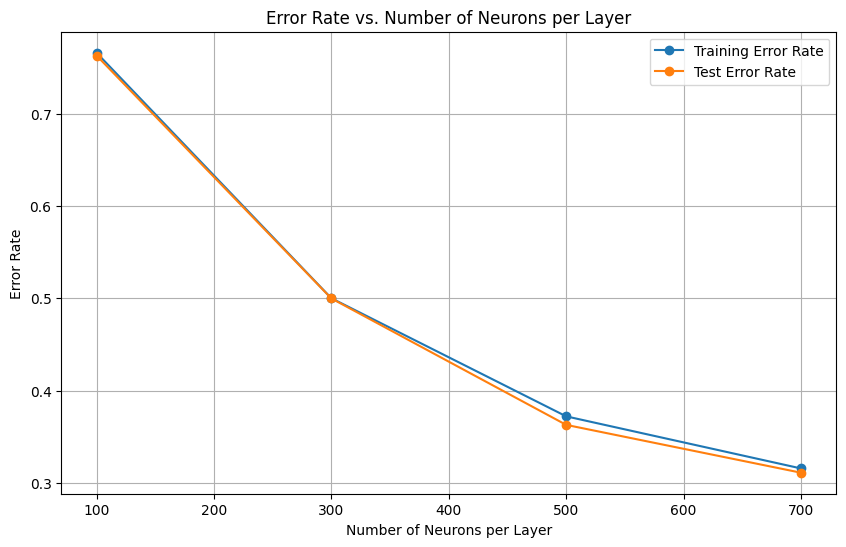

In [27]:
import matplotlib.pyplot as plt

# Load the error rates for each number of neurons per layer
neurons_per_layer = [100, 300, 500, 700]
train_error_rates_neurons = []
test_error_rates_neurons = []

for n_neurons in neurons_per_layer:
    train_error_rates_neurons = load_object("pretrain_layer_error_rate_train_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    test_error_rates_neurons = load_object("pretrain_layer_error_rate_test_neurons_" + str(n_neurons) + ".pkl","../results/experiments_mnist")
    

# Plotting the error rates for different numbers of neurons per layer
plt.figure(figsize=(10, 6))
plt.plot(neurons_per_layer, train_error_rates_neurons, label='Training Error Rate', marker='o')
plt.plot(neurons_per_layer, test_error_rates_neurons, label='Test Error Rate', marker='o')

plt.xlabel('Number of Neurons per Layer')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Neurons per Layer')
plt.legend()
plt.grid(True)
plt.show()


# 3.  As a function of the number of data trains 

## 3.1. Without pretraining

In [59]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm



def create_stratified_subset(data, labels, num_samples_per_class):
    """
    Create a stratified subset of the dataset ensuring each class is represented equally.

    Parameters:
    - data (np.ndarray): The dataset.
    - labels (np.ndarray): The labels for the dataset.
    - num_samples_per_class (int): Number of samples per class.

    Returns:
    - subset_data (np.ndarray): Stratified subset of the dataset.
    - subset_labels (np.ndarray): Labels for the stratified subset.
    """
    unique_classes = np.unique(labels)
    subset_data = []
    subset_labels = []

    for cls in unique_classes:
        class_indices = np.where(labels == cls)[0]
        selected_indices = class_indices[:num_samples_per_class]
        subset_data.append(data[selected_indices])
        subset_labels.append(labels[selected_indices])

    subset_data = np.concatenate(subset_data, axis=0)
    subset_labels = np.concatenate(subset_labels, axis=0)

    return subset_data, subset_labels


In [61]:
n_samples, n_visible = mnist_train.shape  # n_samples, n_features
n_classes = mnist_test_labels.shape[1]

# Defining different sizes for the subsets ensuring equal representation for each class
data_sizes = [1000, 3000, 7000, 10000, 30000, 60000]
num_classes = len(np.unique(mnist_train_labels))
layer_loss_data = []
layer_error_rate_train_data = []
layer_error_rate_test_data = []

for data_size in data_sizes:
    num_samples_per_class = data_size // num_classes
    subset_train_data, subset_train_labels = create_stratified_subset(mnist_train, mnist_train_labels, num_samples_per_class)
    
    hidden_layer_sizes = [200] * 2  # Fixer le nombre de couches à 2 avec 200 neurones chacune
    dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)
    loss = dnn.backpropagation(subset_train_data, labels=subset_train_labels, n_epochs=2, learning_rate=3e-4, batch_size=512)
    layer_loss_data.append(loss)
    
    error_rate_train, _ = dnn.test(test_data=subset_train_data, true_labels=subset_train_labels)
    layer_error_rate_train_data.append(error_rate_train)  # Assurez-vous que error_rate_train est un scalaire

    error_rate_test, _ = dnn.test(test_data=mnist_test, true_labels=mnist_test_labels)
    layer_error_rate_test_data.append(error_rate_test)  # Assurez-vous que error_rate_test est un scalaire

    # Save the lists with losses and error rates
    save_object(layer_loss_data, "number_loss_data_" + str(data_size) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_train_data, "number_error_rate_train_data_" + str(data_size) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_test_data, "number_error_rate_test_data_" + str(data_size) + ".pkl","../results/experiments_mnist")


Training: 100%|██████████| 2/2 [00:00<00:00, 31.20epoch/s]


Epoch 1/2, Cross Entropy: 1.4035415101100215
Epoch 2/2, Cross Entropy: 0.0027747167298477933


Training: 100%|██████████| 2/2 [00:00<00:00,  9.49epoch/s]


Epoch 1/2, Cross Entropy: 0.6961602291207222
Epoch 2/2, Cross Entropy: 0.004069820426297297


Training:  50%|█████     | 1/2 [00:00<00:00,  4.47epoch/s]

Epoch 1/2, Cross Entropy: 0.2504860292642554


Training: 100%|██████████| 2/2 [00:00<00:00,  4.04epoch/s]


Epoch 2/2, Cross Entropy: 0.0024442273533698297


Training:  50%|█████     | 1/2 [00:00<00:00,  3.25epoch/s]

Epoch 1/2, Cross Entropy: 0.16428246346333525


Training: 100%|██████████| 2/2 [00:00<00:00,  2.92epoch/s]


Epoch 2/2, Cross Entropy: 0.0018543479470075081


Training:  50%|█████     | 1/2 [00:00<00:00,  1.10epoch/s]

Epoch 1/2, Cross Entropy: 0.7163679589777028


Training: 100%|██████████| 2/2 [00:01<00:00,  1.07epoch/s]


Epoch 2/2, Cross Entropy: 0.4109548716819977


Training:  50%|█████     | 1/2 [00:01<00:01,  1.89s/epoch]

Epoch 1/2, Cross Entropy: 1.0850417512298223


Training: 100%|██████████| 2/2 [00:03<00:00,  1.94s/epoch]


Epoch 2/2, Cross Entropy: 0.8021181346858172


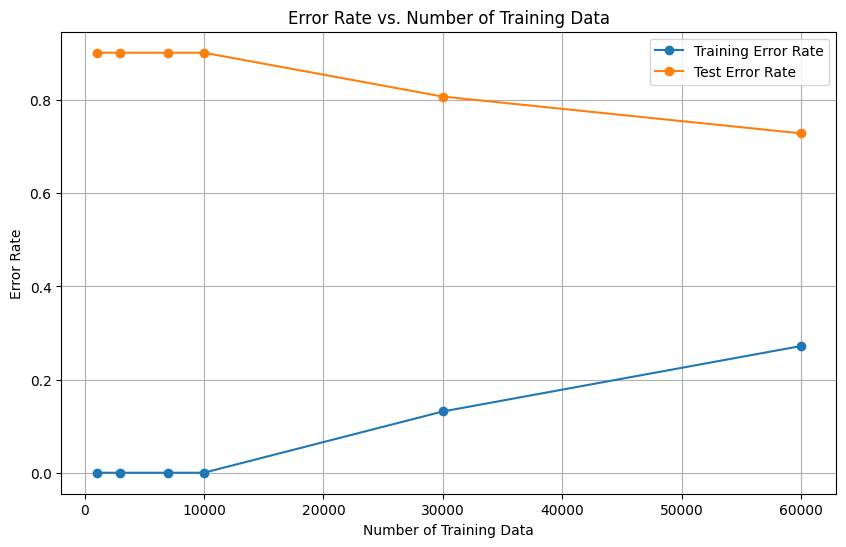

In [63]:
# Load the error rates for each data size
data_sizes = [1000, 3000, 7000, 10000, 30000, 60000]
train_error_rates_data = []
test_error_rates_data = []

for data_size in data_sizes:
    train_error_rates_data = load_object("number_error_rate_train_data_" + str(data_size) + ".pkl")
    test_error_rates_data = load_object("number_error_rate_test_data_" + str(data_size) + ".pkl")
    
# Plotting the error rates for different numbers of training data
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, train_error_rates_data, label='Training Error Rate', marker='o')
plt.plot(data_sizes, test_error_rates_data, label='Test Error Rate', marker='o')

plt.xlabel('Number of Training Data')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Training Data')
plt.legend()
plt.grid(True)
plt.show()


## 3.2. With pretraining

In [ ]:
n_samples, n_visible = mnist_train.shape  # n_samples, n_features
n_classes = mnist_test_labels.shape[1]

# Defining different sizes for the subsets ensuring equal representation for each class
data_sizes = [1000, 3000, 7000, 10000, 30000, 60000]
num_classes = len(np.unique(mnist_train_labels))
layer_loss_data = []
layer_error_rate_train_data = []
layer_error_rate_test_data = []

for data_size in data_sizes:
    num_samples_per_class = data_size // num_classes
    subset_train_data, subset_train_labels = create_stratified_subset(mnist_train, mnist_train_labels, num_samples_per_class)
    
    hidden_layer_sizes = [200] * 2  # Fixer le nombre de couches à 2 avec 200 neurones chacune
    dnn = DNN(input_dim=n_visible, output_dim=n_classes, hidden_layer_sizes=hidden_layer_sizes, random_state=42)

    # pretrain
    dnn.train(mnist_train, n_epochs=2, learning_rate=3e-4, batch_size=512)

    loss = dnn.backpropagation(subset_train_data, labels=subset_train_labels, n_epochs=2, learning_rate=3e-4, batch_size=512)
    layer_loss_data.append(loss)
    
    error_rate_train, _ = dnn.test(test_data=subset_train_data, true_labels=subset_train_labels)
    layer_error_rate_train_data.append(error_rate_train)  # Assurez-vous que error_rate_train est un scalaire

    error_rate_test, _ = dnn.test(test_data=mnist_test, true_labels=mnist_test_labels)
    layer_error_rate_test_data.append(error_rate_test)  # Assurez-vous que error_rate_test est un scalaire

    # Save the lists with losses and error rates
    save_object(layer_loss_data, "pretrain_number_loss_data_" + str(data_size) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_train_data, "pretrain_number_error_rate_train_data_" + str(data_size) + ".pkl","../results/experiments_mnist")
    save_object(layer_error_rate_test_data, "pretrain_number_error_rate_test_data_" + str(data_size) + ".pkl","../results/experiments_mnist")


In [ ]:
# Load the error rates for each data size
data_sizes = [1000, 3000, 7000, 10000, 30000, 60000]
train_error_rates_data = []
test_error_rates_data = []

for data_size in data_sizes:
    train_error_rates_data = load_object("pretrain_number_error_rate_train_data_" + str(data_size) + ".pkl", "../results/experiments_mnist")
    test_error_rates_data = load_object("pretrain_number_error_rate_test_data_" + str(data_size) + ".pkl", "../results/experiments_mnist")
    
# Plotting the error rates for different numbers of training data
plt.figure(figsize=(10, 6))
plt.plot(data_sizes, train_error_rates_data, label='Training Error Rate', marker='o')
plt.plot(data_sizes, test_error_rates_data, label='Test Error Rate', marker='o')

plt.xlabel('Number of Training Data')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Number of Training Data')
plt.legend()
plt.grid(True)
plt.show()
